<a href="https://colab.research.google.com/github/HarperArtsandAnalytics/HarperArtsandAnalytics/blob/main/PYF_Project_LearnerNotebook_Harper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Importing numpy, pandas, matplotlib, and seaborn to allow for easy access of the data from foodhub. This will enable the ability to analyze the data creating a fair assesment of the variety and the demand of restaurants to enhance customer experience.

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
data = pd.read_csv('foodhub_order.csv')
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
data.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations: There are 1897 rows, and 9 columns, restaurant_name, cuisine_type, cost_of_the_order are worth note. Also some null or "not given" under ratings will have to be addressed.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 3 different data types: float64(1), int64(4), and object (4). The float column deals with money as it has a decimal and is the cost of orders. The integer columns are numbers without decimals such as customer and order id's, and delivery times. the object columns range from day of the week, ratings, cuisine type, to the name of the restaurant.
Lastly, rating is reading as object but should be int64, and food_preparation_time is reflecting integer but should be in date and time format.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values, however the 'not given' in rating as seen in the first question may cause issues when analyzing the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: The minimum food preperation time is 20 minutes, average or mean is 27.37 minutes, and the maximum amount of time is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are 736 orders that are not rated or 'not given'.

1.   List item
2.   List item




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Columns to explore: order id, customer id, restaurant name, cuisine type, cost of the order, day of the week, rating, food prep time, and delivery time.

In [ ]:
df['order_id'].nunique()

1898

Observations: There are 1898 unique order ID's which is expected and reflects no duplicated orders.

In [ ]:
df['customer_id'].unique()

array([337525, 358141,  66393, ...,  97838, 292602, 397537])

In [ ]:
df['order_id'].unique()

array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056])

In [ ]:
df.groupby('order_id')['customer_id'].nunique()

order_id
1476547    1
1476548    1
1476549    1
1476550    1
1476551    1
          ..
1478440    1
1478441    1
1478442    1
1478443    1
1478444    1
Name: customer_id, Length: 1898, dtype: int64

Observations: Customer id and order id indicate correlation and no duplicates.

In [ ]:
df['restaurant_name'].unique()


array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [ ]:
df['restaurant_name'].nunique()

178

Observation: There are 178 unique restaurant names.




In [ ]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
df['cuisine_type'].nunique()

14

Observations: There are 14 different cuisine types.

In [ ]:
df['cost_of_the_order'].unique()

array([30.75, 12.08, 12.23, 29.2 , 11.59, 25.22,  6.07,  5.97, 16.44,
        7.18,  5.92,  8.1 , 24.3 , 11.3 , 12.13, 16.2 , 16.98, 33.03,
       14.12, 24.2 , 15.91, 29.1 ,  8.92, 15.86, 21.88, 14.02,  9.17,
       12.18, 31.33, 29.05,  8.39,  9.12, 15.47, 16.01, 29.83, 19.89,
       19.35, 33.22, 24.25, 22.75,  6.74, 13.78, 16.93, 29.39, 20.23,
       14.6 ,  6.79, 31.38,  8.34, 12.46, 14.55, 32.93,  8.  , 13.05,
        5.67, 29.29, 16.15, 13.34,  9.75,  6.69,  4.75, 12.56, 21.2 ,
       19.31, 16.3 , 25.27, 14.79,  5.72,  9.22, 16.39, 17.03, 21.83,
       31.29, 11.83, 22.26, 20.47, 15.81, 22.36,  8.68, 12.9 , 29.15,
        7.86, 16.1 , 12.95, 11.69, 12.32, 14.99, 10.38,  9.65,  5.77,
        9.56, 29.34, 11.16, 14.07, 22.8 , 15.23, 16.49,  8.83, 16.25,
       16.83, 10.24, 19.4 , 13.97, 13.  ,  8.49, 20.18, 19.59, 16.11,
       12.27, 13.39,  9.02, 15.33, 31.43, 29.35, 15.28,  9.6 ,  8.88,
       15.96,  8.05,  8.54,  7.23, 19.69,  9.27,  8.97, 11.64, 13.15,
        9.41,  9.07,

In [ ]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
df['food_preparation_time'].unique()

array([25, 23, 20, 28, 33, 21, 29, 34, 24, 30, 35, 32, 31, 27, 22, 26])

In [ ]:
df['delivery_time'].unique()

array([20, 23, 28, 15, 24, 21, 30, 26, 22, 17, 25, 16, 29, 27, 18, 31, 32,
       19, 33])

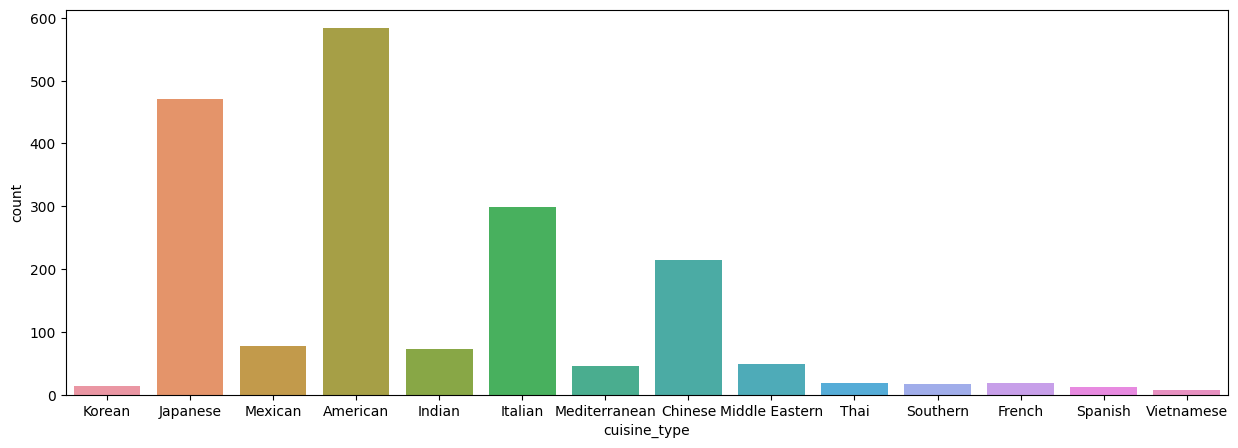

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type');

Observations: There are 14 unique cuisine types, and the easiest way to see which type sells the most is via a countplot bar chart. American, Japenese, and Italian have the highest amount of orders. Vietnamese has the lowest amount of orders indicating is least preferred.

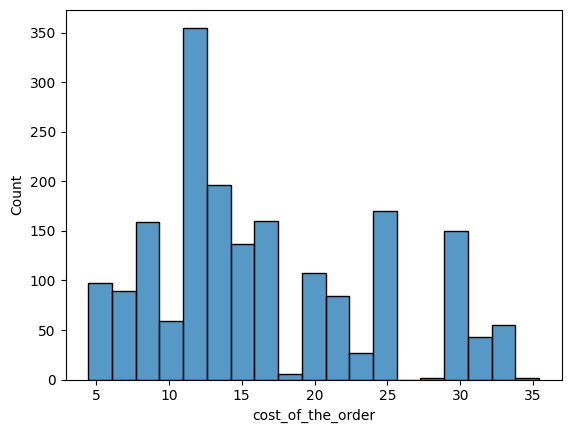

In [ ]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

Observations: The highest amount of orders are between 10-15 dollars.

In [ ]:
##Day of the week
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_t

2

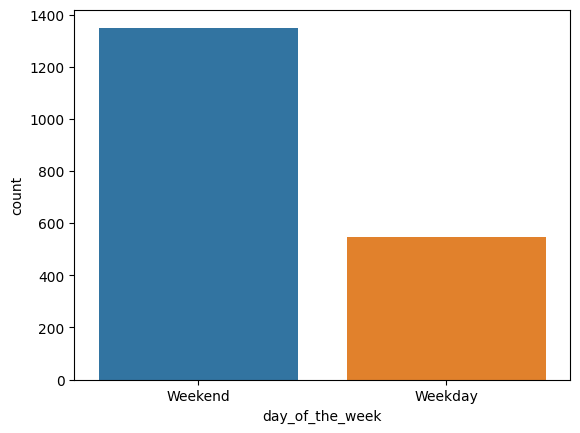

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week');

Observations: The weekend has the highest amount of orders and sales.

In [ ]:
##rating
df['rating'].nunique()

4

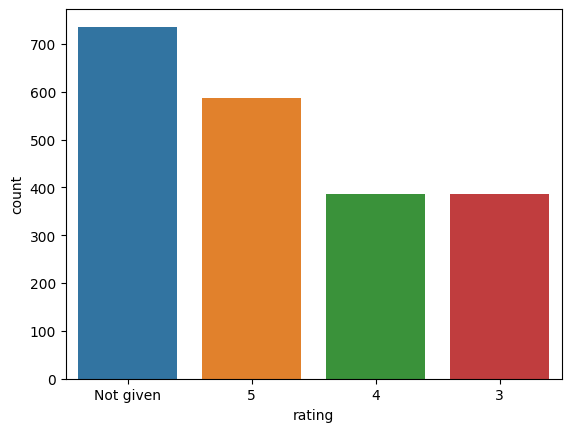

In [ ]:
sns.countplot(data = df, x = 'rating')
s = df['rating'].value_counts()
s = df['rating'].value_counts().rename_axis('rating').rename('count') # if x- and y-labels are important
sns.barplot(x=s.index, y=s.values, order=s.index);
plt.show()

Observations: For rating, changing the Not given to 0 or null would negatively impact the overall average rating for each restaurant. In this case it is better to reflect 'not given' to indicate no rating response was given at time of order. Not given has the highest count, second highest count is the higehst rating of 5 which reflects well on customer experience with foodhub orders.

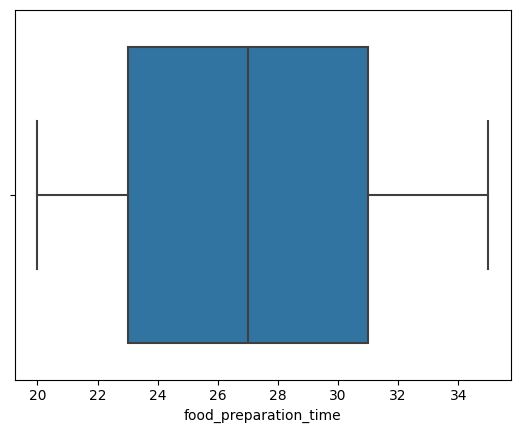

In [ ]:
##Food_preparation_time
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Observations: For food preparation the mean or 50 % is 27 min, the 1st 20-23, 2nd quartile is 23-27, 3rd quartile is 27-31, and the outliers in 4th quartile is 31-35. Meaning the majority of orders
 in the inner quartile food prep time is 23-31 minutes.

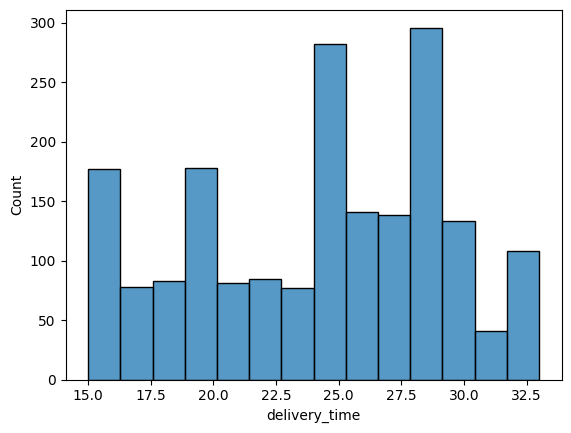

In [ ]:
##Delivery Time
sns.histplot(data=df,x='delivery_time')
plt.show()

Observations: The majority of orders take between 23-28 min to deliver.The minimum delivery time was 15 minutes, and the maximum was 35 min.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
##restaurant_name
df['restaurant_name'].head(5)

0                      Hangawi
1    Blue Ribbon Sushi Izakaya
2                  Cafe Habana
3    Blue Ribbon Fried Chicken
4             Dirty Bird to Go
Name: restaurant_name, dtype: object

#### Observations: Hangawi has the highest amount of orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
##Most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].nunique()
df_weekend['cuisine_type'].value_counts()
#select cuisine_type, count(*) from df_weekend group by cuisine_type order by count(*) desc


American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: The most popular cuisine on weekends is American with count of 415.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
df.info

<bound method DataFrame.info of       order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
0            Korean              30.75         Weekend  No

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
The mean delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
Customers with multiple orders, these 5 qualify for 20% discount.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


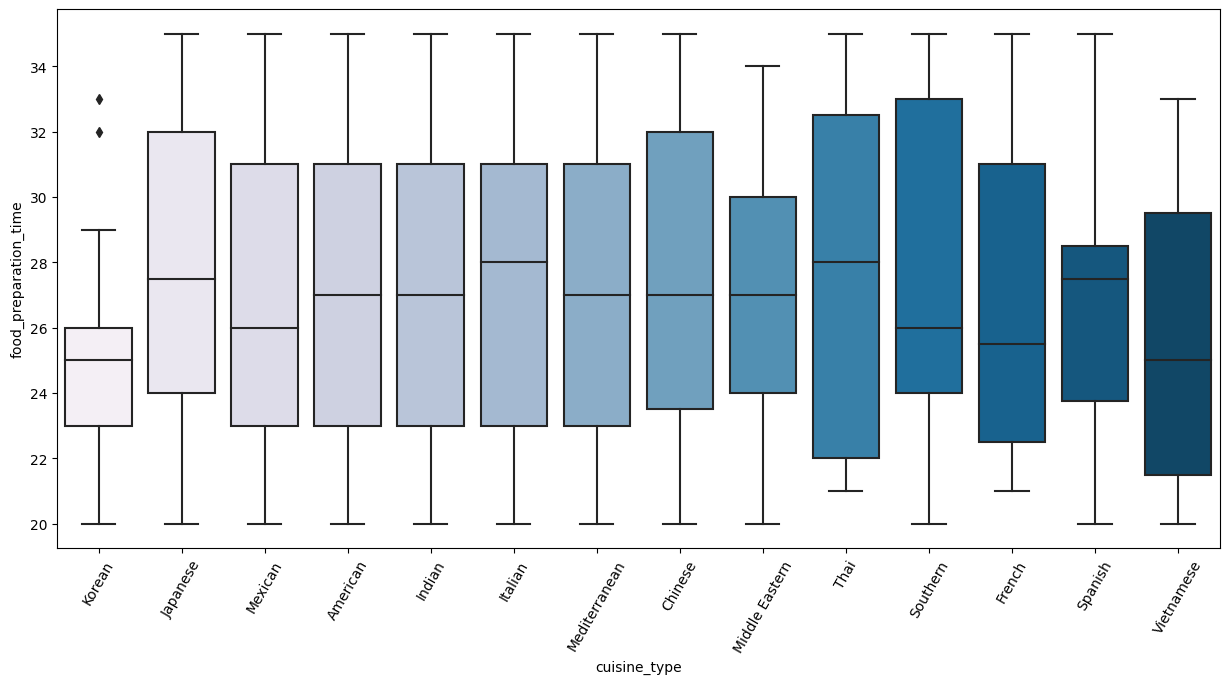

In [ ]:
#Relationship between food_preparation_time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type",y="food_preparation_time",data=df,palette='PuBu')
plt.xticks(rotation=60)
plt.show()

Observations: Thai and Southern Cuisine's have the highest food preparation time.

Observations: Southern Cuisine Type has the highest cost of orders (purchased).

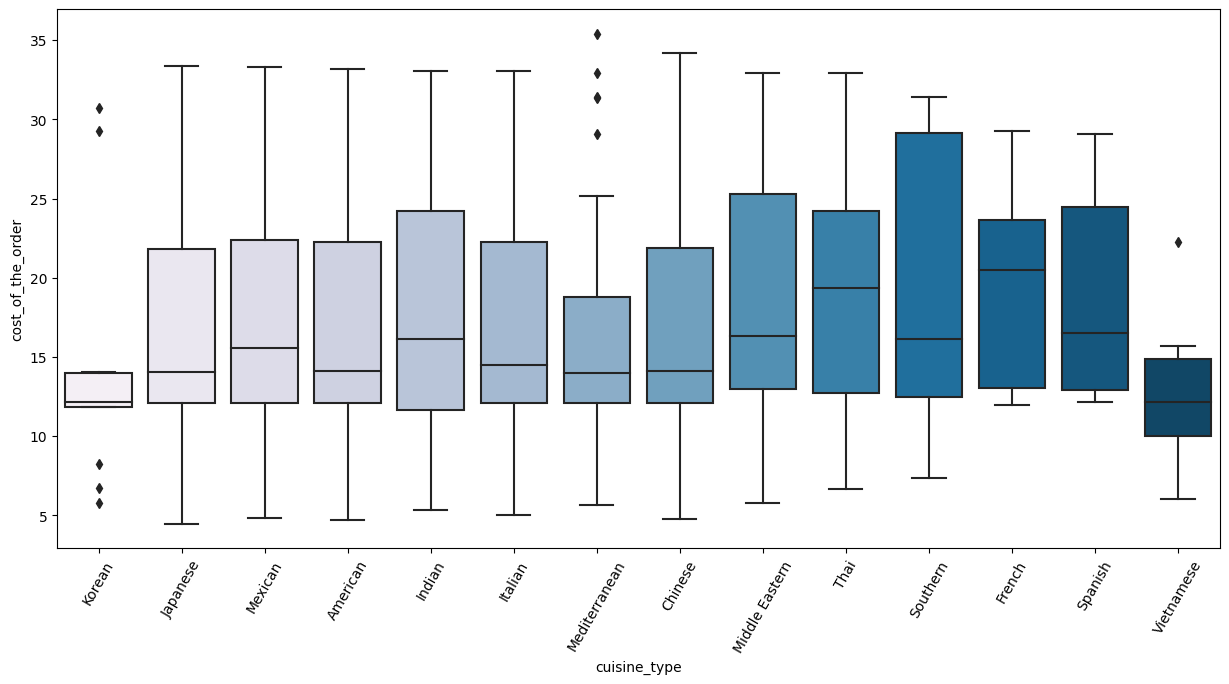

In [ ]:
#Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type",y="cost_of_the_order",data=df,palette='PuBu')
plt.xticks(rotation=60)
plt.show()

Observations: Southern cuisine has the highest cost of the order.

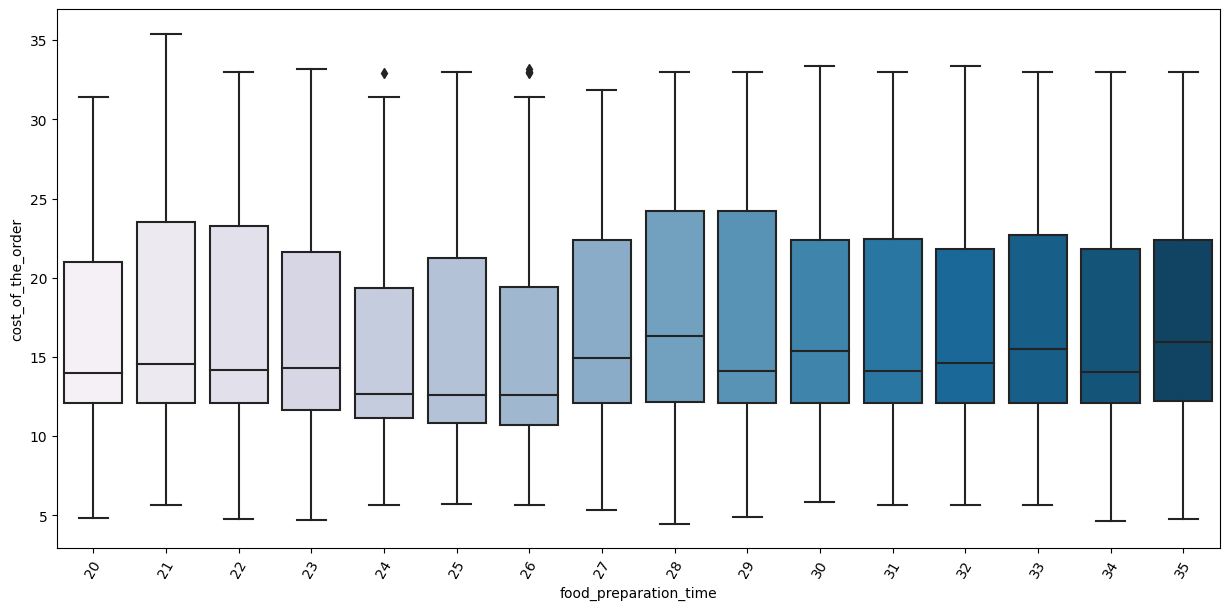

In [ ]:
#Relationship between cost of the order and food_preparation
plt.figure(figsize=(15,7))
sns.boxplot(x="food_preparation_time",y="cost_of_the_order",data=df,palette='PuBu')
plt.xticks(rotation=60)
plt.show()

Observations: Cost of the order has very little impact preparation time.

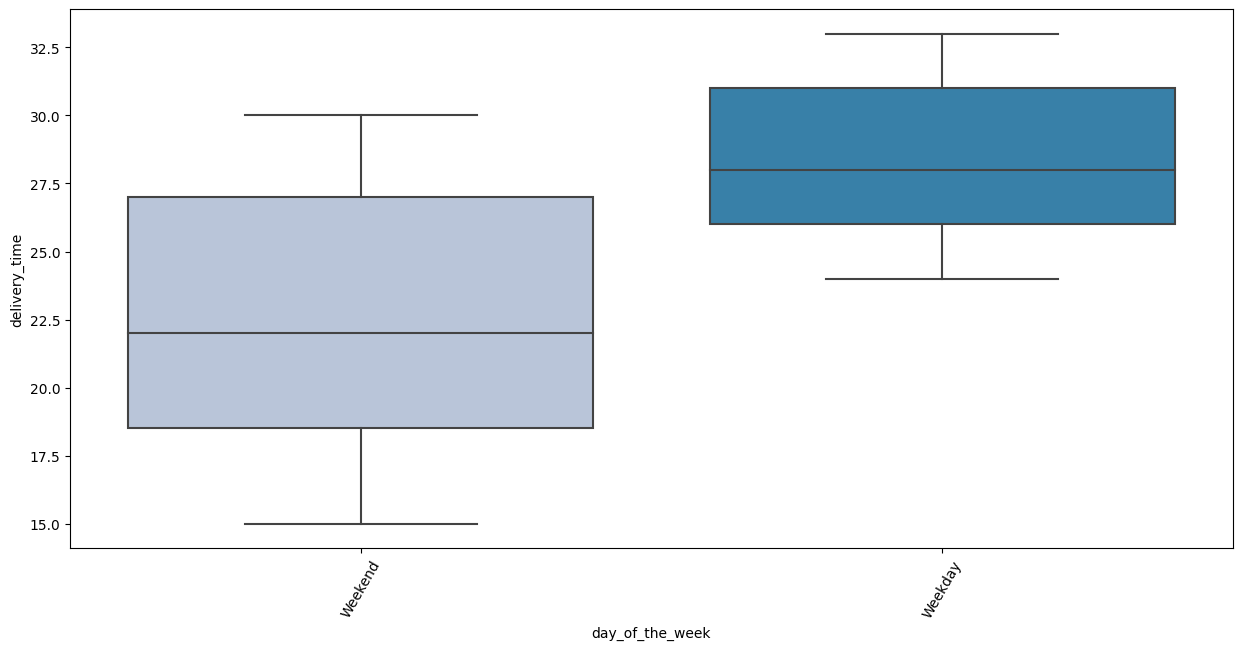

In [ ]:
#Relationship between Day of the week and Delivery Time
plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_the_week",y="delivery_time",data=df,palette='PuBu')
plt.xticks(rotation=60)
plt.show()

Observations: Average Delivery time is shorter on the weekends.

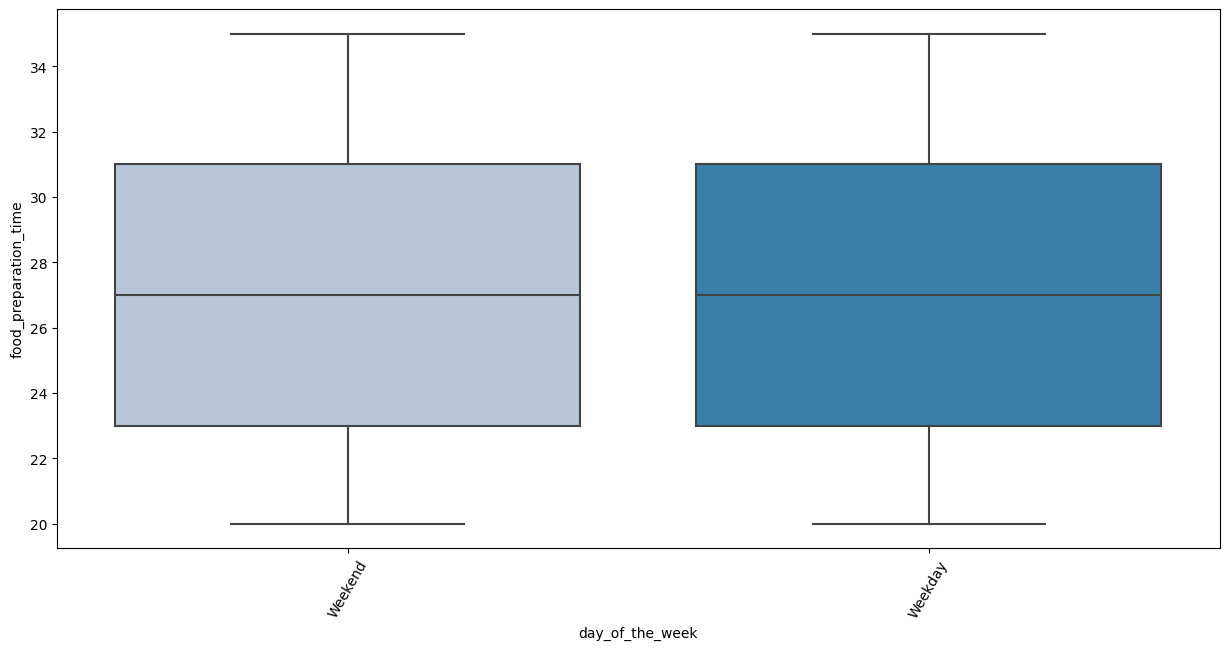

In [ ]:
#Relationship between Day of the week and Delivery Time
plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_the_week",y="food_preparation_time",data=df,palette='PuBu')
plt.xticks(rotation=60)
plt.show()

Observations: Day of the week does not impact food prepartion time.

<ipython-input-89-8f0684207156>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


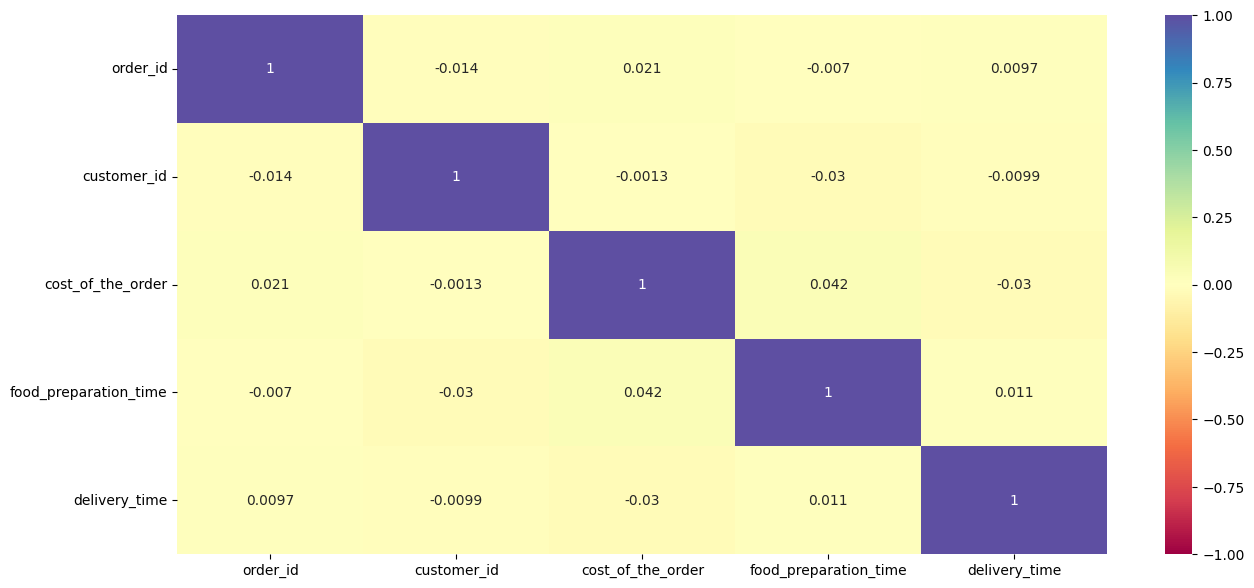

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

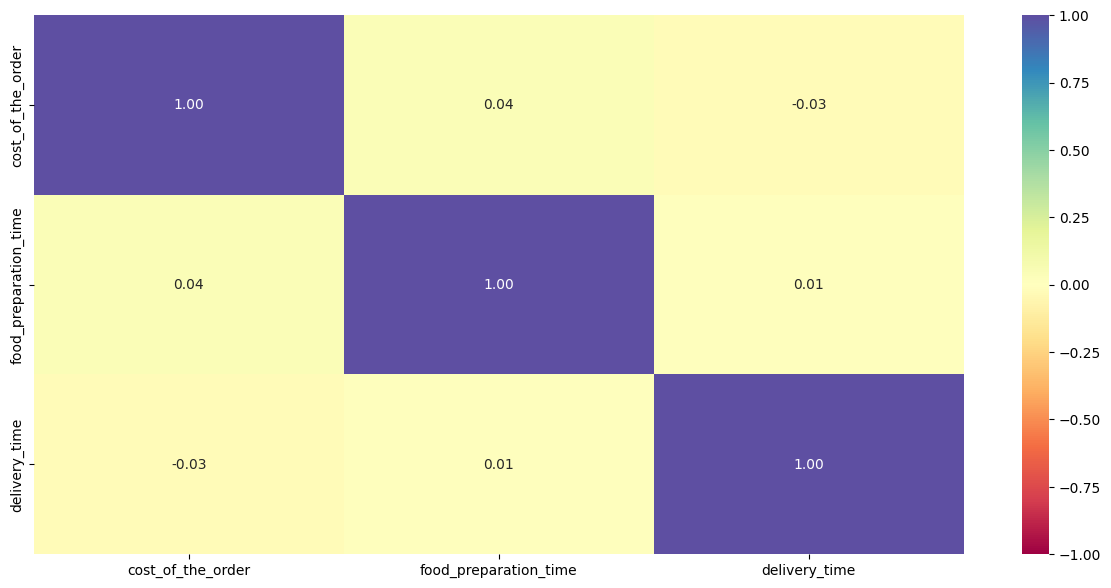

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation: Delivery time and cost of the order can potentially have a negative impact.

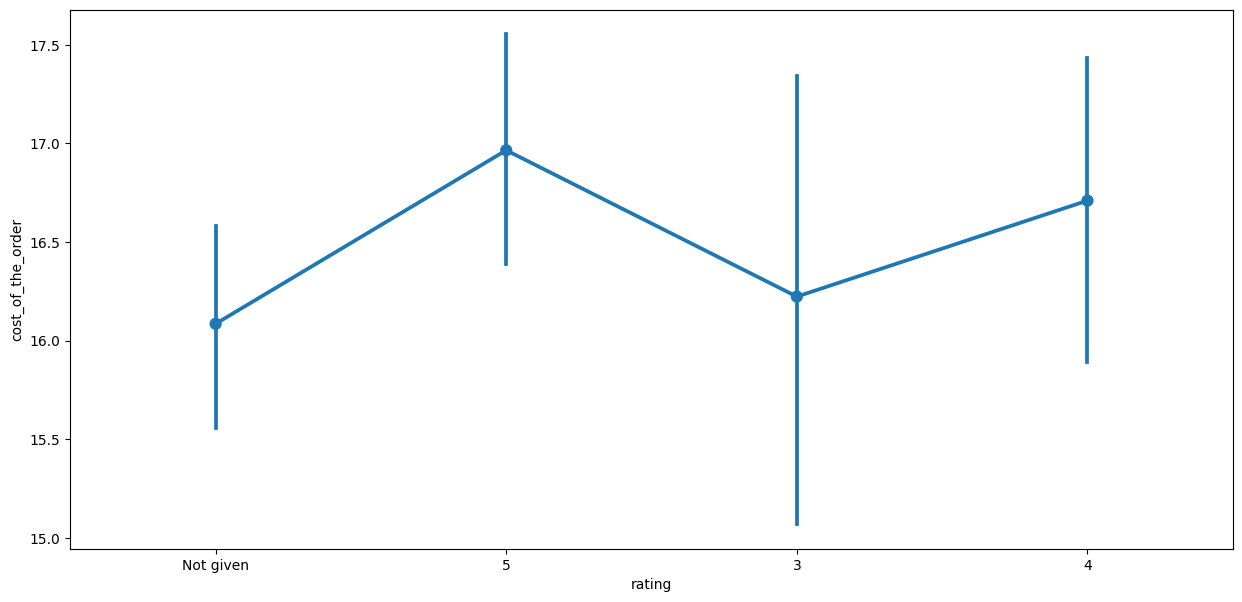

In [ ]:
#Rating vs Cost of Order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

Observation: The higher cost of the order (purchase price) also correlates with highest rating, which can be indiciative of liking the food more in turn buying more.

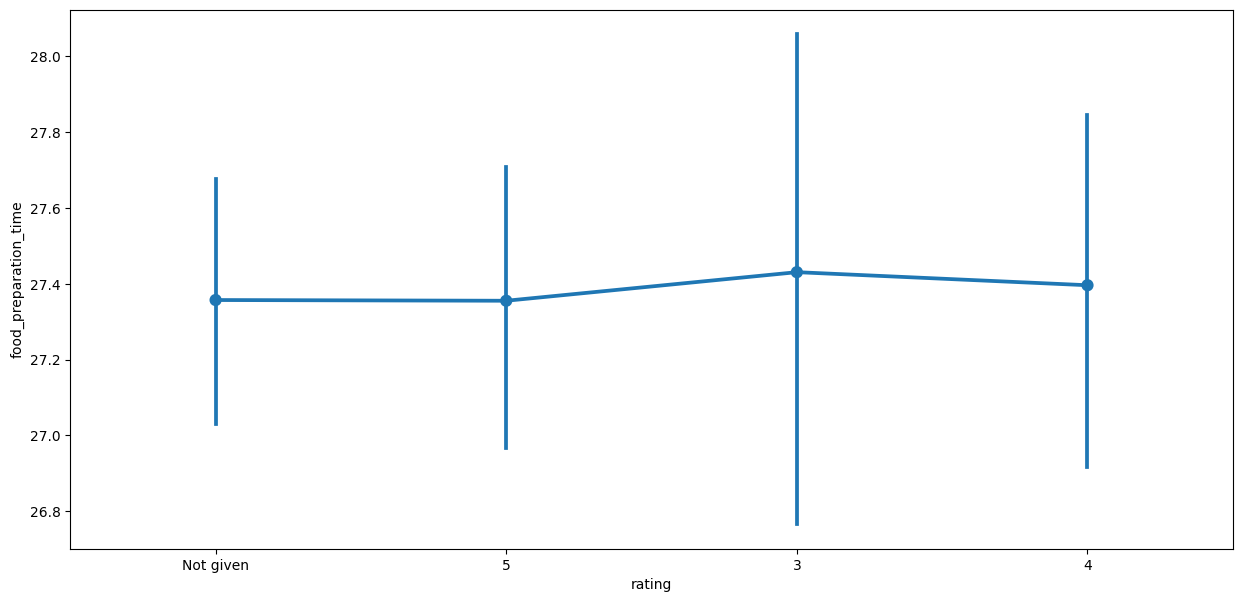

In [ ]:
#Rating vs Food Prepartion Time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

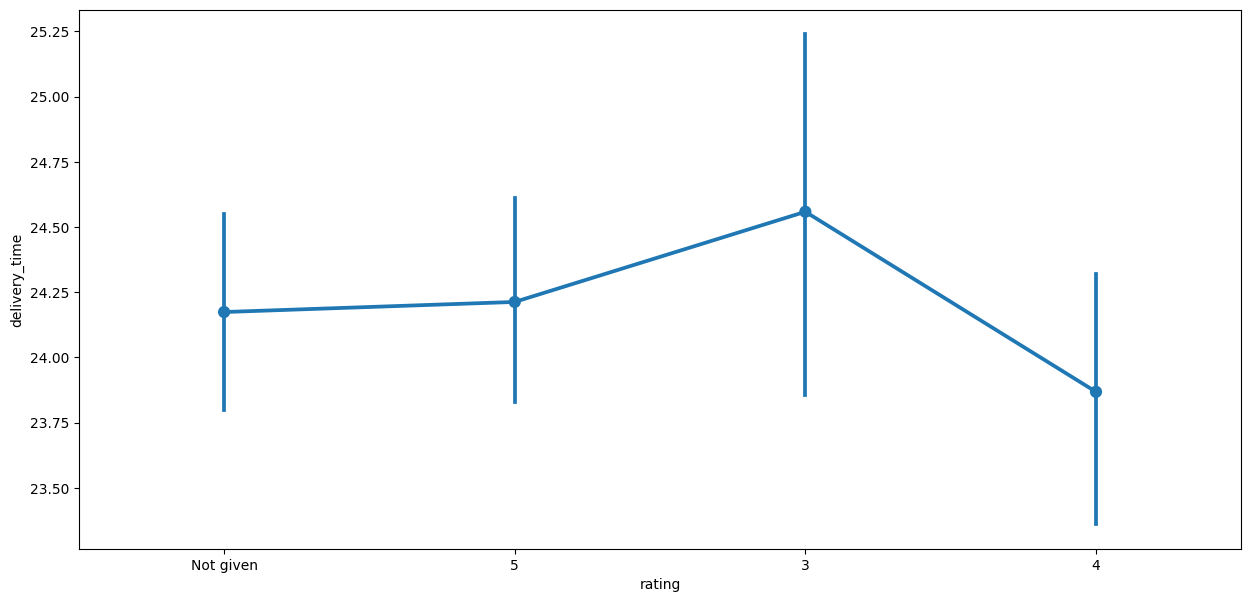

In [ ]:
#Rating vs Delivery Time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Observations: Food prep and delivery time have very little impact towards ratings, the highest impact is on 3 for both ratings where there is the most room for improvement. Possible changes in food prep and delivery time would be to shorten food prep time, time could translate to improvement with customer satisfaction.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df_rating = df[df['rating'] != 'Not given'].copy()
df_rating['rating'] = df_rating['rating'].astype('int')
df_ratings_count = df_rating.groupby(['restaurant_name'])['rating'].count().sort_values(ascending= False).reset_index()
#select restaurant_name, count(review) from df_ratings group by restaurant_name order by count(review)
df_ratings_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


#### Observations: The top 5 restaurants that meet the criteria are shake shack, the meatball shop, blue ribbon sushi, blue ribbon fried chicken, and redfarm broadway.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
df.columns.values.tolist() #print the column names
['order_id',
'customer_id',
'restaurant_name',
'cuisine_type',
'cost_of_the_order',
'day_of_the_week',
'rating',
'food_preparation_time',
'delivery_time']
#function to determine the revenue
def compute_rev(x):
	if x > 20:
		return x*0.25
	elif x > 5:
		return x*0.15
	else:
		return x*0
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
total_rev = df['Revenue'].sum()

The net revenue is around 6166.3 dollars


#### Observations: The net revenue is approx. 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#total deliverey time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_greater_than_50 = df[df['total_time']>50]
print('The number of total orders that has delivery time 60 minutes is:',
df_greater_than_50)
percentage = (df_greater_than_50.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that has delivery time 60 minutes is:       order_id  customer_id             restaurant_name   cuisine_type  \
2      1477070        66393                 Cafe Habana        Mexican   
7      1477859        89574                   Barbounia  Mediterranean   
9      1477311        39705               Bukhara Grill         Indian   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼        Chinese   
14     1478198        62667      Lucky's Famous Burgers       American   
...        ...          ...                         ...            ...   
1887   1476873       237616                 Shake Shack       American   
1889   1478190        94152            RedFarm Broadway        Chinese   
1895   1477819        35309           Blue Ribbon Sushi       Japanese   
1896   1477513        64151           Jack's Wife Freda  Mediterranean   
1897   1478056       120353           Blue Ribbon Sushi       Japanese   

      cost_of_the_order day_of_the_week     ra

#### Observations: 55.95% of orders are above 20.00.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
print('The mean delivery time on weekdays is around',
round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
      'minutes')

The mean delivery time on weekdays is around 28 minutes


In [ ]:
print('The mean delivery time on weekdays is around',
round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
      'minutes')

The mean delivery time on weekdays is around 22 minutes


#### Observations: the mean delivery time on weekdays is 28 minutes, and weekends is 22 minutes.

---




### Conclusion and Recommendations:

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The most popular cuisine on weekends is American with count of 415 orders, the weekend has the highest amount of orders but lowest amount per order averaging between 10-15 dollars. There are more customers who do not feel compelled to leave any rating as 736 orders were placed without one, which can be as negative as a poor rating. There were a total of 1898 orders placed, that means  almost 38% of customers  are either to busy, not inclined, not inspired, not impressed enough to leave a rating.

* The highest food preparation time was 35 minutes, lowest was 20, and the average is approximately 27 min. The average food prep time is 27.8 min. and the average delivery time is 24.2 minutes meaning our average turnaround time for an order is approximately 52 minutes.  While food preparation time has very little impact on customer ratings, delivery time had the lowest rating correlation of 3,  lastly cost of the order or customer purchase total had the highest impact and rating of 5. The highest rating impact most likely means the customer already favors the place and purchases more food per order.

### Recommendations:

*  Recommendations: We need to find creative ways to inspire customers to want to leave positive feedback, as positive feedback typically leads to more sales. We previously offered a 20% discount for repeat customers, it is recommended to offer a discount for new customer ratings. A 38% non rating is also an excellent chance to find opportunities to impress our customers so we can receive the positive rating feedback. As our highest amount of orders is on the weekends, but is also our lowest average per order sales. It is our recommendation to focus specials on American cuisine to boost the per order cost, as that is also the most popular cuisine on the weekends. Lastly, our recommendation is to focus on food prep and delivery time with overall turnaround time of 52 minutes. By finding creative ways to lesson prep time, it will give a little more flexibility in delivery time. While we have less control over how long it takes to deliver our orders, we also recommend streamlining paths and hiring more drivers to maximize order delivery experiences.

---